# Introduction/Abstract

**Insert a nice Figure**


Introduction to the problem and data set. 

General workflow explanation

Main result

# Importing Packages and dataset

In [285]:
# EDA and visualization
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

# Scaling
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Dataset handling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.ensemble import ExtraTreesClassifier # for Feature importance selection

# Cross validation & model selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit

# Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV


# Model evaluation
from sklearn.metrics import accuracy_score

%matplotlib inline

In [8]:
url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/train_data_imputed.csv'
df = pd.read_csv(url)
df.set_index(df.columns[0], inplace=True)
df.index.names = ["ID"]


# splitting Features and target variables

features = df.drop(["mortstat"], axis=1, inplace=False)
target = df[["mortstat"]]

print(features.shape)
print(target.shape)

(791, 109)
(791, 1)


# Exploratory data analysis

Descriptive statistics

*   Descriptive statistics
*   Distribution of feature and target values
*   Correlation analysis
*   Dimensionality reduction






In [301]:
print(df.head())
print(df.shape)
print(df.columns)

           BMXWT    BMXBMI  BMXWAIST  ...  MCQ250F  MCQ250G  mortstat
ID                                    ...                            
10004   88.60000  29.64000  100.9000  ...        2        2         0
10101   83.30000  26.44000  105.0000  ...        2        2         1
10104   90.20000  33.29000  109.3000  ...        2        1         0
10131   73.10000  27.72000  104.6000  ...        2        2         1
10249  106.44032  38.03476  122.8848  ...        2        2         1

[5 rows x 110 columns]
(791, 110)
Index(['BMXWT', 'BMXBMI', 'BMXWAIST', 'ALQ120Q', 'BPXSAR', 'BPXDAR',
       'RIDAGEMN', 'INDFMPIR', 'DRXTKCAL', 'DRXTPROT',
       ...
       'MCQ160K', 'MCQ160L', 'MCQ220', 'MCQ250A', 'MCQ250B', 'MCQ250C',
       'MCQ250E', 'MCQ250F', 'MCQ250G', 'mortstat'],
      dtype='object', length=110)


In [6]:
# checking for missing values
print("Missing values:", df.isnull().sum().sum())
print(df.dtypes)
print(df.describe().T)

Missing values: 0
BMXWT       float64
BMXBMI      float64
BMXWAIST    float64
ALQ120Q     float64
BPXSAR      float64
             ...   
MCQ250C       int64
MCQ250E       int64
MCQ250F       int64
MCQ250G       int64
mortstat      int64
Length: 110, dtype: object


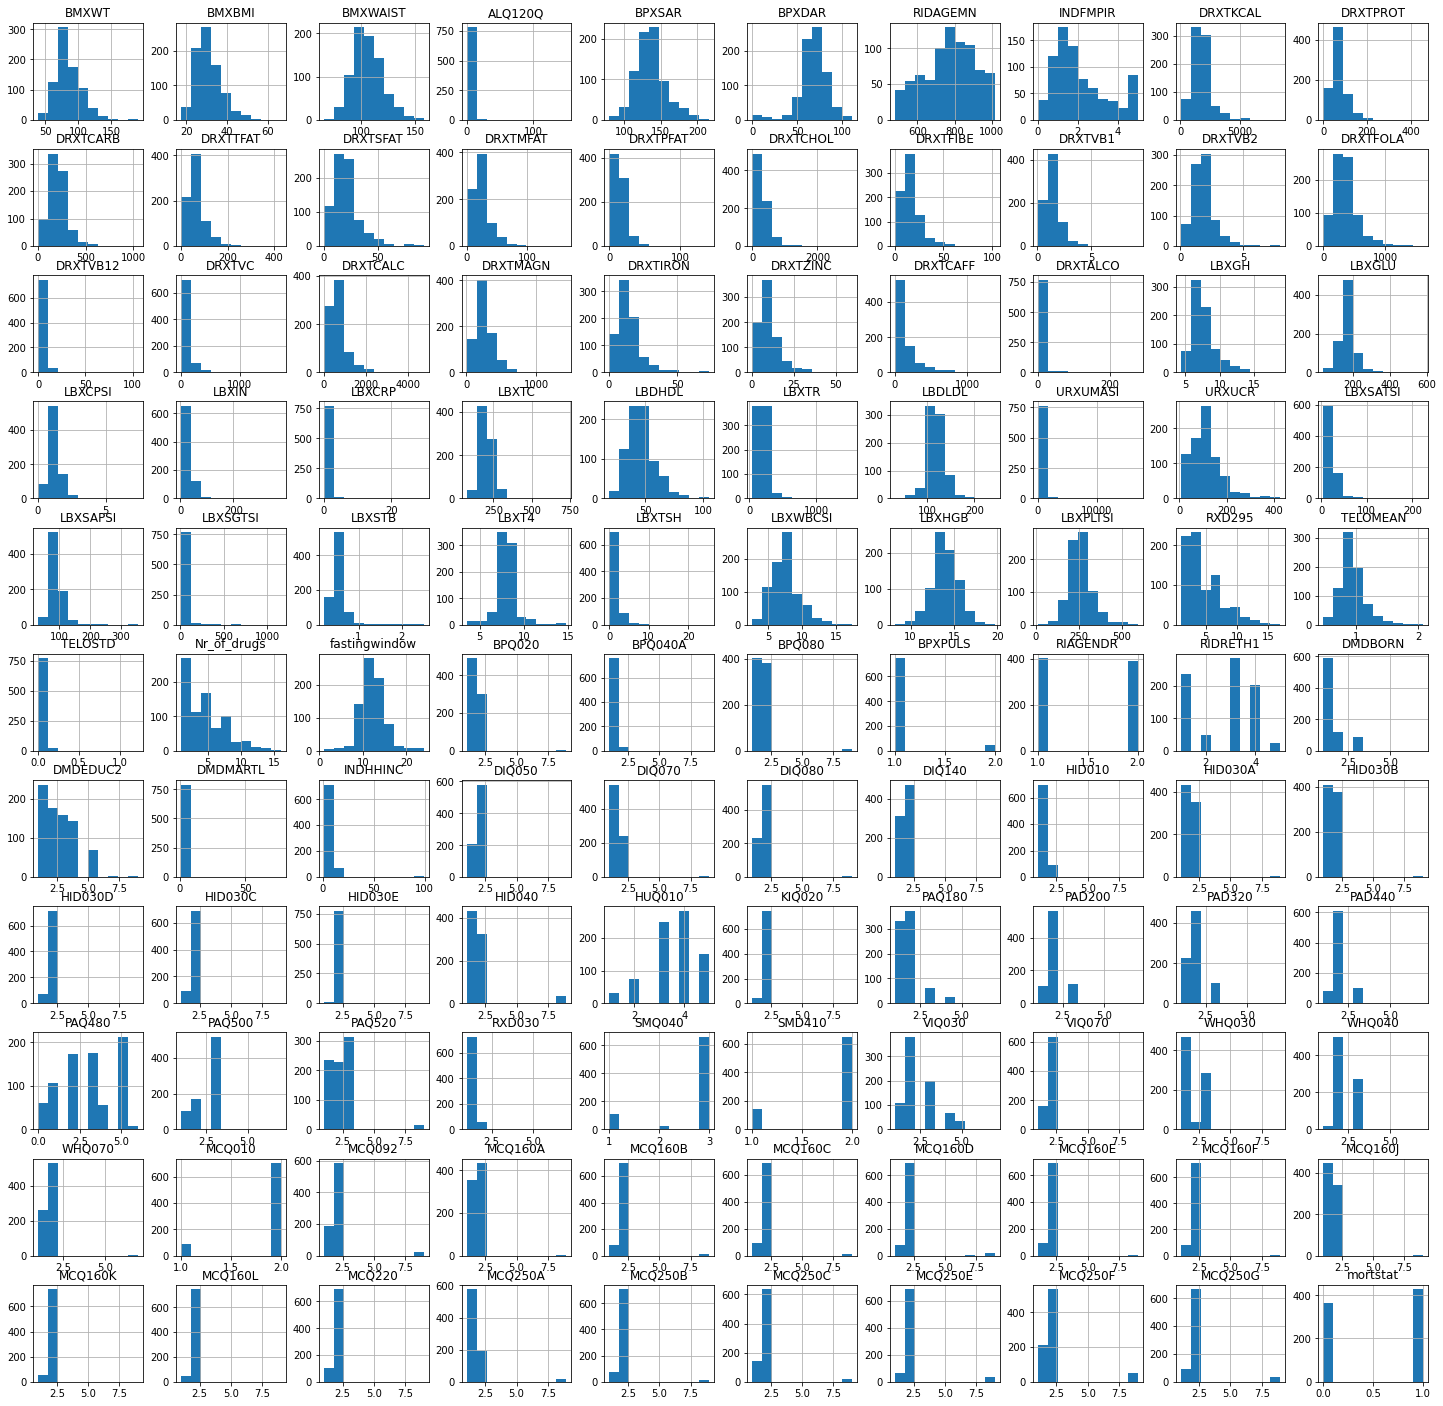

In [9]:
# Distribution of features and target
_ = df.hist(figsize=(25,25))

Target variable mortstat appears to be balanced. Accuracy could be used as a metric to evaluate and score model performance.

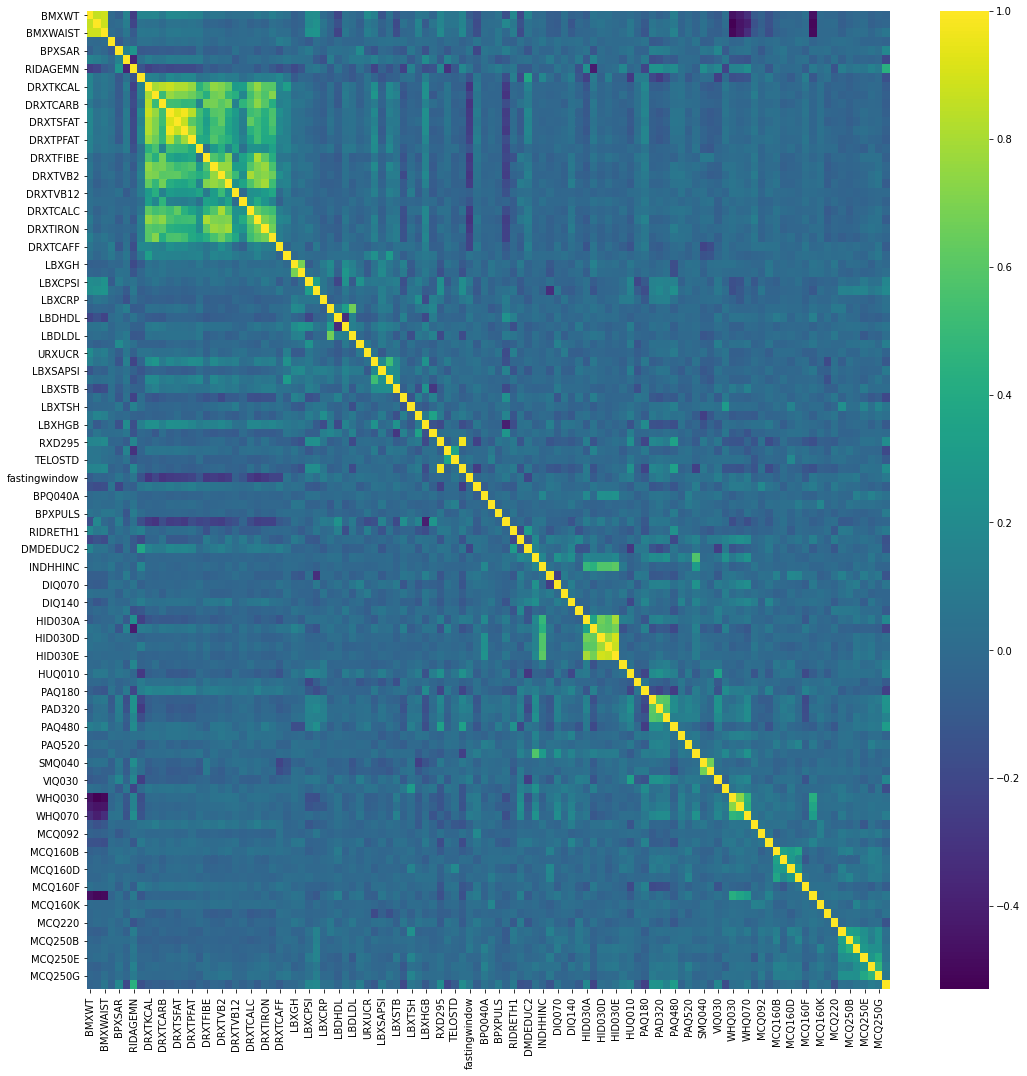

In [10]:
# Correlation analysis of features
plt.figure(figsize=(18, 18))
_ = sns.heatmap(df.corr(), annot = False, cmap = 'viridis')

Several features appear to be highly correlated to each other and may be redundant/irrelavant. Features with high correlation could be filtered out.

### Principal component analysis

In [72]:
# PCA without scaling

x = features.values #convert features to an array
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) # Performing the principal component analysis on features
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

principalDF = pd.DataFrame(data=principalComponents, columns = ["PC 1", "PC 2"])
principalDF.set_index(features.index, inplace=True)
principalDF = pd.concat([principalDF,target], axis=1) # adding the target variable back to PCA for later visualization
#print(principalDF)


Explained variation per principal component: [0.59316782 0.29974601]


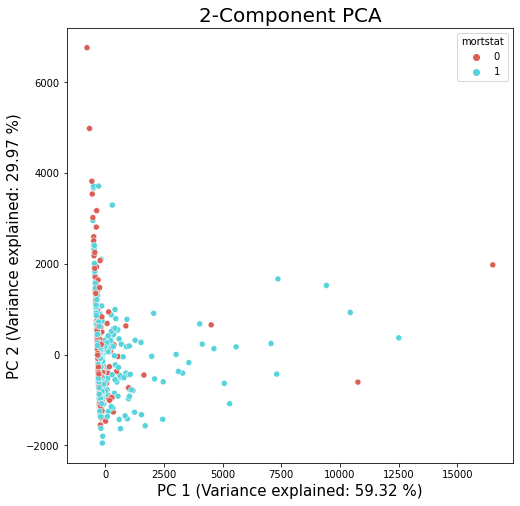

In [73]:
# Plot PCA, no scaling

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 (Variance explained: {:.2f} %)'.format(pca.explained_variance_ratio_[0]*100), fontsize = 15)
ax.set_ylabel('PC 2 (Variance explained: {:.2f} %)'.format(pca.explained_variance_ratio_[1]*100), fontsize = 15)
ax.set_title('2-Component PCA', fontsize = 20)

_=sns.scatterplot(data=principalDF, x="PC 1",y="PC 2", hue="mortstat",palette=sns.color_palette("hls", 2))

PCA skews strongly to the side. Scaling is necessary.

In [74]:
# PCA with scaling
x = features.values #convert features to an array
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) # Performing the principal component analysis on features
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

principalDF = pd.DataFrame(data=principalComponents, columns = ["PC 1", "PC 2"])
principalDF.set_index(features.index, inplace=True)
principalDF = pd.concat([principalDF,target], axis=1) # adding the target variable back to PCA for later visualization
#print(principalDF)


Explained variation per principal component: [0.09957878 0.04822453]


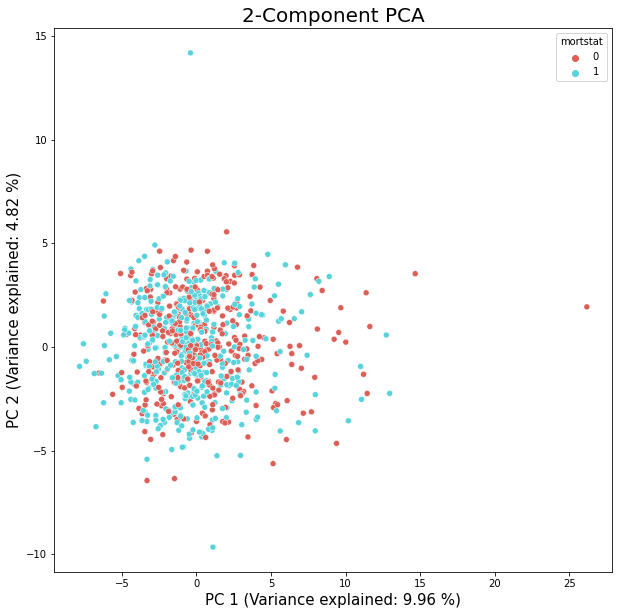

In [83]:
# Plot PCA
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1) 
ax1.set_xlabel('PC 1 (Variance explained: {:.2f} %)'.format(pca.explained_variance_ratio_[0]*100), fontsize = 15)
ax1.set_ylabel('PC 2 (Variance explained: {:.2f} %)'.format(pca.explained_variance_ratio_[1]*100), fontsize = 15)
ax1.set_title('2-Component PCA', fontsize = 20)

_=sns.scatterplot(data=principalDF, x="PC 1",y="PC 2", hue="mortstat",palette=sns.color_palette("hls", 2))

Standard scaling greatly reduced the variance explained by the PCs. However, the visualization becomes clearer.
No clear groups or clusters are visible in the data set.

### tSNE analysis

PCA did not yield any clear grouping. 
tSNE may provide more information.

In [76]:
# tSNE with scaling
x = features.values #convert features to an array
x = StandardScaler().fit_transform(x)

tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=500)
tsne_results = tsne.fit_transform(x)

tsne_results

tSNEDF = pd.DataFrame(data=tsne_results, columns = ["tSNE 1", "tSNE 2"])
tSNEDF.set_index(df.index, inplace=True)

tSNEDF = pd.concat([tSNEDF,df[["mortstat"]]], axis=1)
print(tSNEDF)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 791 samples in 0.010s...
[t-SNE] Computed neighbors for 791 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 791 / 791
[t-SNE] Mean sigma: 3.158283
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.202774
[t-SNE] KL divergence after 500 iterations: 1.522624
         tSNE 1     tSNE 2  mortstat
ID                                  
10004  2.796000   1.656641         0
10101 -1.760474  -7.613632         1
10104  1.372464   1.558618         0
10131 -1.895350  -1.848816         1
10249  6.176342   7.003068         1
...         ...        ...       ...
9890   5.873052   6.204801         0
9906   6.238742   0.287924         0
9931   1.137127  -4.067599         1
9988   1.368585  -2.444655         0
999   -1.454730 -11.725756         1

[791 rows x 3 columns]


In [84]:
# Add mean values of the groups to the tSNE plot
tSNE_mean = tSNEDF.groupby(["mortstat"]).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


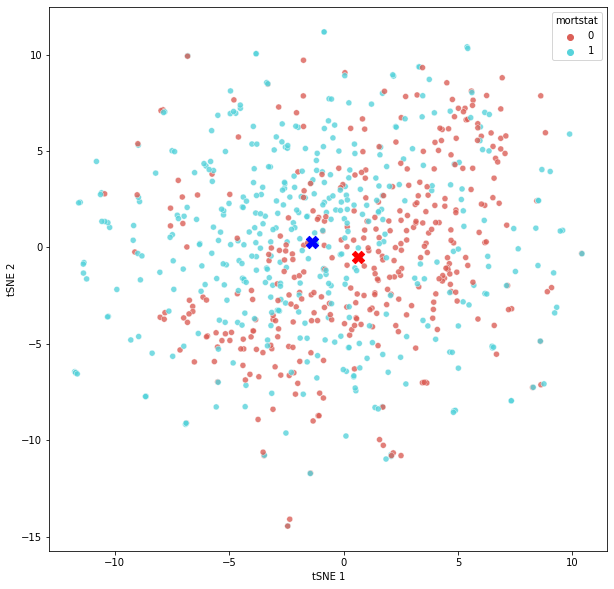

In [91]:
plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel('tSNE 1', fontsize = 15)
ax2.set_ylabel('PC 2 (Variance explained: {:.2f} %)'.format(pca.explained_variance_ratio_[1]*100), fontsize = 15)
ax2.set_title('2-Component PCA', fontsize = 20)
_=sns.scatterplot(
    x="tSNE 1", y="tSNE 2",
    hue="mortstat",
    palette=sns.color_palette("hls", 2),
    data=tSNEDF,
    legend="full",
    alpha=0.8
    )
_=plt.scatter(x=tSNE_mean["tSNE 1"][0], y=tSNE_mean["tSNE 2"][0], c="r", marker="X", s=150)
_=plt.scatter(x=tSNE_mean["tSNE 1"][1], y=tSNE_mean["tSNE 2"][1], c="b", marker="X", s=150)


Although there is no clear grouping visible the the 2 patient groups appear to be slightly separated.

## Conclusion of EDA


1.   The dataset contains a mix of continuous, discrete and categorical variables at vastly different scales. Normalization is required. Target variable is well balanced and therefore accurcay may be a sufficient score for model performance.
2.   Correlation analysis showed some features are highly correlated and may be redundant.
3.   tSNE and PCA do not indicate presence of clear groups but indicate differences in the patients.




# Feature selection

As observed during EDA there is a high correlation between some features. Correlating features may not add new information for the model and can therefore be excluded.
Furthermore, some features may not be relevant for the model and only add noise. Those features can be removed to improve model performance, training time and help to avoid overfitting.

## Remove highly correlated features

In [160]:
# Remove features with high correlation
# Of any 2 features with a correlation >= 0.75 remove one of them

corr = features.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75:
            if columns[j]:
                columns[j] = False
                
selected_columns = features.columns[columns]
features_subset = features[selected_columns]



In [251]:
print(selected_columns)
print(features_subset.shape)
print("The removed features includes:", features.columns[~features.columns.isin(features_subset.columns)].values)

Index(['BMXWT', 'ALQ120Q', 'BPXSAR', 'BPXDAR', 'RIDAGEMN', 'INDFMPIR',
       'DRXTKCAL', 'DRXTCHOL', 'DRXTFIBE', 'DRXTVB1', 'DRXTVB12', 'DRXTVC',
       'DRXTZINC', 'DRXTCAFF', 'DRXTALCO', 'LBXGH', 'LBXGLU', 'LBXCPSI',
       'LBXIN', 'LBXCRP', 'LBXTC', 'LBDHDL', 'LBXTR', 'LBDLDL', 'URXUMASI',
       'URXUCR', 'LBXSATSI', 'LBXSAPSI', 'LBXSGTSI', 'LBXSTB', 'LBXT4',
       'LBXTSH', 'LBXWBCSI', 'LBXHGB', 'LBXPLTSI', 'RXD295', 'TELOMEAN',
       'TELOSTD', 'fastingwindow', 'BPQ020', 'BPQ040A', 'BPQ080', 'BPXPULS',
       'RIAGENDR', 'RIDRETH1', 'DMDBORN', 'DMDEDUC2', 'DMDMARTL', 'INDHHINC',
       'DIQ050', 'DIQ070', 'DIQ080', 'DIQ140', 'HID010', 'HID030A', 'HID030B',
       'HID030D', 'HID040', 'HUQ010', 'KIQ020', 'PAQ180', 'PAD200', 'PAD320',
       'PAD440', 'PAQ480', 'PAQ500', 'PAQ520', 'RXD030', 'SMQ040', 'SMD410',
       'VIQ030', 'VIQ070', 'WHQ030', 'WHQ040', 'WHQ070', 'MCQ010', 'MCQ092',
       'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F',
       'MCQ160J', 'M

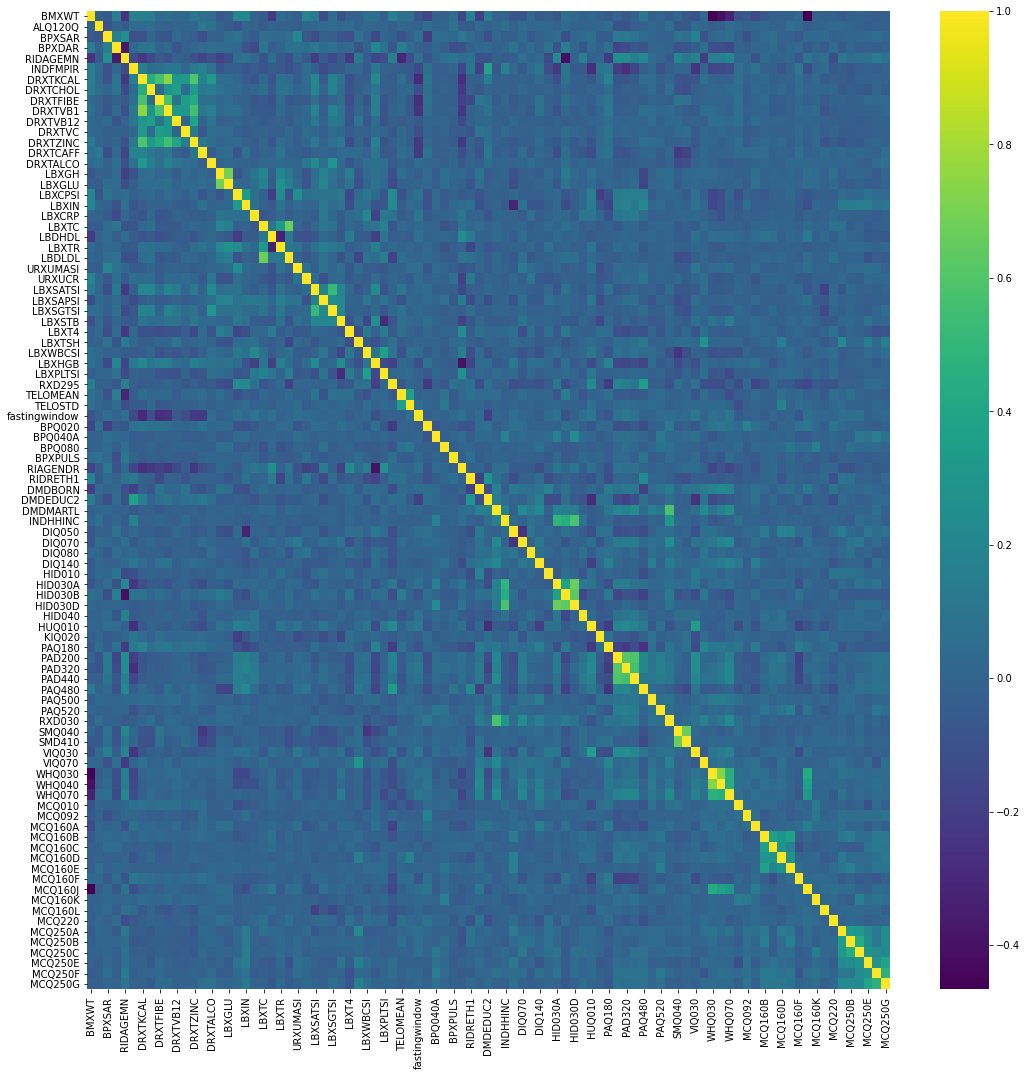

In [162]:
# Correlation analysis of features after removing highly correlated features
plt.figure(figsize=(18, 18))
_ = sns.heatmap(features_subset.corr(), annot = False, cmap = 'viridis')

### Univariate feature selection

In [172]:
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=features_subset.shape[1]) # instantiate scorer object, chi2 may not be suitable for continuous values??
fit = bestfeatures.fit(features_subset,target) # Scores every feature


In [186]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_subset.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['feature','Score']   #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

     feature         Score
24  URXUMASI  54582.981938
4   RIDAGEMN   3553.356883
6   DRXTKCAL   2105.653269
13  DRXTCAFF   1213.978498
18     LBXIN    525.903095
11    DRXTVC    334.533173
7   DRXTCHOL    155.232805
22     LBXTR    138.327767
26  LBXSATSI    121.214826
3     BPXDAR    104.508771
2     BPXSAR     75.966581
64    PAQ480     70.003270
35    RXD295     62.193229
25    URXUCR     55.610977
1    ALQ120Q     38.270219
27  LBXSAPSI     32.778387
14  DRXTALCO     31.548443
8   DRXTFIBE     22.585497
48  INDHHINC     19.060001
20     LBXTC     16.609345


In [187]:
# select the 60 best features

selection = featureScores.nlargest(60,"Score")
#print(selection["feature"].values.tolist())

selected_features = features_subset[selection["feature"].values.tolist()]
print(selected_features.shape)

(791, 60)


### Conclusion
**Top 4 features**
1. URXUMASI: Albumin, urine (mg/L) SI 
2. RIDAGEMN: Age in Months
3. DRXTKCAL: Energy (kcal)	
4. DRXTCAFF: Caffeine (mg)

# Model selection and cross validation

In [265]:
# splitting Features and target variables

X = selected_features.values
y = target.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1217)


In [266]:
models = ["Logistic Regression", 
          "LinearSVC", 
          "SVC", 
          "kNN",
          "Decision tree",
          "Random forest", 
          "Gradient boosting",
          "Gaussian Naive Bayes"]

clfs = []
clfs.append(LogisticRegression())
clfs.append(LinearSVC(random_state=216))
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=10))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier(random_state=216))
clfs.append(GradientBoostingClassifier())
clfs.append(GaussianNB())

print(clfs)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=216, tol=0.0001,
          verbose=0), SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'), De

In [267]:
# Instantiate the ML pipeline to ensure reproducible steps
pipeline=Pipeline([
                   ("Scaler" , StandardScaler()),
                   ("clf" , "passthrough")    # passthrough is a placeholder
])
pipeline.steps

# More steps could be added: Dimensionality reduction via PCA

[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf', 'passthrough')]

In [ ]:
results=[]
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=10) # 10 cross validation folds, 
    results.append(scores)

In [269]:
#Evaluate performance of each model

results_mean = []
for dict in results:
  dict_temp = {}
  for key,values in dict.items():
    dict_temp[key] = values.mean() 
  results_mean.append(dict_temp)

scores_df = pd.DataFrame(results_mean)
scores_df.set_index(pd.Index(models), inplace=True)
print(scores_df)

                      fit_time  score_time  test_score
Logistic Regression   0.013001    0.000717    0.717825
LinearSVC             0.088554    0.001105    0.706948
SVC                   0.027146    0.003019    0.726818
kNN                   0.003731    0.006442    0.679838
Decision tree         0.014300    0.000742    0.645455
Random forest         0.235679    0.009978    0.728669
Gradient boosting     0.503143    0.001077    0.723442
Gaussian Naive Bayes  0.002394    0.000550    0.690584


### Conclusion

Support vector clustering achieves the highest test score with 74.12 % accuracy


# Hyperparameter-tuning

In [298]:
pipeline.set_params(clf = SVC())
pipeline.steps


[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [271]:
param_grid = {"clf__kernel" : ['linear', 'rbf'],
              "clf__C" : np.logspace(-1,1,num=4, base=10),
              "clf__gamma" : np.logspace(-9, 1, num=4, base=10),
              "clf__degree" : np.linspace(0, 1, 2)
              }
print(param_grid)


{'clf__kernel': ['linear', 'rbf'], 'clf__C': array([ 0.1       ,  0.46415888,  2.15443469, 10.        ]), 'clf__gamma': array([1.00000000e-09, 2.15443469e-06, 4.64158883e-03, 1.00000000e+01]), 'clf__degree': array([0., 1.])}


In [ ]:
cv_grid = GridSearchCV(pipeline, param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)) # cross validation could be added
cv_grid.fit(X_val, y_val)

In [273]:
print("The best parameters are %s with a score of %0.3f"
      % (cv_grid.best_params_, cv_grid.best_score_))

The best parameters are {'clf__C': 0.46415888336127786, 'clf__degree': 0.0, 'clf__gamma': 0.004641588833612782, 'clf__kernel': 'rbf'} with a score of 0.779


### Score of first Hyperparameter tuning

**77.9%** accuracy on validation set.


### Fitting the pipeline with optimized parameters

In [277]:
pipeline.set_params(clf= SVC(C=46415888336127786, gamma=0.004641588833612782, kernel="rbf"))
pipeline.steps

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=46415888336127786, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.004641588833612782, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

# Final evaluation of model on test dataset


In [278]:
# Load unseen data
url = "https://raw.githubusercontent.com/KHSDTC/Hackathon_Autumn2020_Challenge/master/challenge_dataset/unseen_data_imputed.csv"
unseen_df = pd.read_csv(url)
unseen_df.set_index(unseen_df.columns[0], inplace=True)
unseen_df.index.names = ["ID"]

print(unseen_df.head())
print(unseen_df.shape)

           BMXWT     BMXBMI    BMXWAIST  ...  MCQ250F  MCQ250G  mortstat
ID                                       ...                            
10007  74.200000  26.570000   89.600000  ...        1        2         1
10106  73.900000  26.500000  100.500000  ...        2        2         0
10445  75.404028  27.287283  100.739197  ...        2        2         1
10448  64.400000  22.760000   83.200000  ...        1        2         0
10630  94.500000  39.640000  123.300000  ...        2        2         0

[5 rows x 110 columns]
(88, 110)


## Preprocess unseen data

In [279]:
unseen_features = unseen_df.drop(["mortstat"], axis=1, inplace=False)
unseen_target = unseen_df[["mortstat"]]

# select columns that exclude high correlations with each other
unseen_subset = unseen_features[selected_columns]
print(unseen_subset.shape)

# select best columns

unseen_selected_features = unseen_subset[selection["feature"].values.tolist()]
print(unseen_selected_features.shape)

(88, 93)
(88, 60)


In [286]:
pred = pipeline.predict(unseen_selected_features)
print(pred)

[1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0]


In [296]:
acc = accuracy_score(unseen_target, pred)
print(f'Model Accuracy: %.2f' %(acc*100))

Model Accuracy: 64.77
